In [5]:
pwd

'/home/fdamicel/projects/pycourse/notebooks'

# 

Extracting EDF parameters from /home/fdamicel/projects/pycourse/data/data-2/ds005420-download/sub-2/eeg/sub-2_task-oa_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


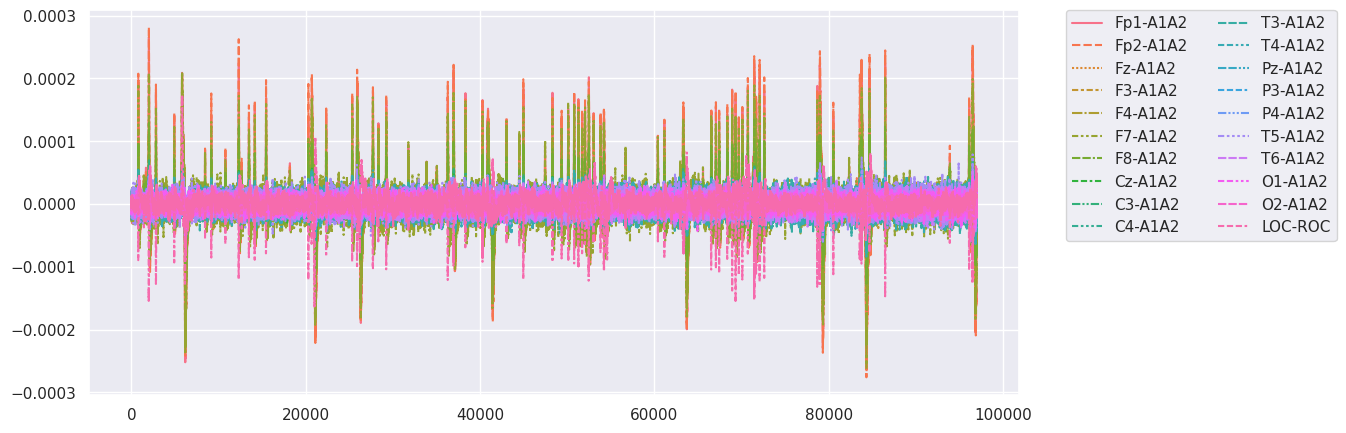

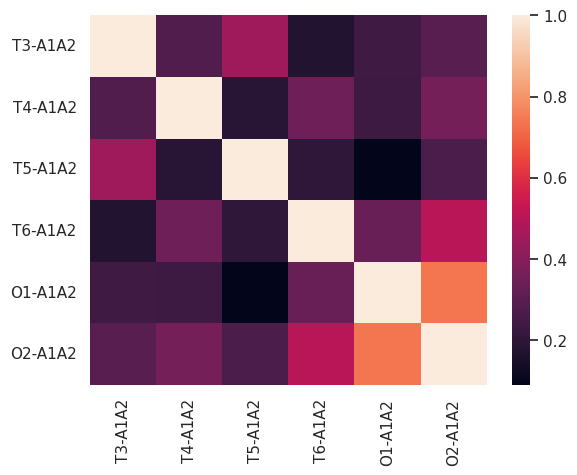

In [8]:
import pathlib

import seaborn as sns
import pandas as pd
import mne
import matplotlib.pyplot as plt

sns.set_theme()

def get_subject_dir(path, subject_number):
    return [obj for obj in path.iterdir() if obj.is_dir() and f"sub-{subject_number}" == obj.name][0]

def get_subject_data(path, subject_number):
    eeg_filepath = path/f"sub-{subject_number}"/"eeg"/f"sub-{subject_number}_task-oa_eeg.edf"
    content = mne.io.read_raw_edf(eeg_filepath)
    data = content.get_data()
    return pd.DataFrame(data.T, columns=content.ch_names)
    
def clean_col_names(subject_data):
    return pd.DataFrame(
        subject_data.values,
        columns=[s.replace("EEG ", "") for s in subject_data.columns]
    )

def plot_subject_data(subject_data, output_path):
    fig, ax = plt.subplots(figsize=(12, 5))
    sns.lineplot(data=subject_data, ax=ax)
    ax.legend(loc="upper left", bbox_to_anchor=(1.05, 1), borderaxespad=0, ncol=2)
    fig.savefig(output_path)

def select_channels(subject_data, channel_startswith):
    return subject_data[[c for c in subject_data.columns if c[0] in channel_startswith]]
    
def plot_corr(subject_data, output_path):
    fig, ax = plt.subplots() 
    sns.heatmap(sub_data.corr(), ax=ax)
    fig.savefig(output_path)

def run_pipeline(input_path, subject_number, output_path):
    path = pathlib.Path(input_path)
    subject_data = get_subject_data(path, subject_number)
    subject_data = clean_col_names(subject_data)
    plot_subject_data(subject_data, output_dir/"out.png")
    sub_data = select_channels(subject_data, ["O", "T"])
    plot_corr(sub_data, output_dir/"corr.png")


input_path = "/home/fdamicel/projects/pycourse/data/data-2/ds005420-download/" # openneuro 
output_path = '/home/fdamicel/projects/pycourse/notebooks'
subject_number = 2
output_dir = pathlib.Path(output_path)/f"sub_{subject_number}"
output_dir.mkdir()

run_pipeline(input_path, subject_number, output_path)